In [2]:
import pandas as pd
import numpy as np

from bursty_dynamics.scores import calculate_scores
from bursty_dynamics.trains import train_detection, train_info, train_scores
from bursty_dynamics.visual import *

# Bursty Dynamics

We will demonstrate how to use Burst_dynamic to:
- [Calcualte the Burstness Parameter (BP) and Memory Coefficient (MC)](#section_1)
- [Detect train of events](#section_2)
- [Get inforamtion of the trains](#section_3)
- [Calculate the BP and MC of the trains](#section_4)
- [Analysing Data with Gender-based Comparisons](#section_5)

## Load data

we will use the 'set3a1.txt' medical data from [UK Biobank Synthetic Dataset](https://biobank.ndph.ox.ac.uk/synthetic_dataset/). 
Out of 23827 unique eids, there are only 500 eids in the example_data.txt because of the limited data space on Github.


In [83]:
df = pd.read_csv("example_data.txt", delimiter= '\t')

In [14]:
df.shape

(858626, 9)

In [15]:
df.head()

,eid,data_provider,event_dt,read_2,read_3,value1,value2,value3,gender
0,1707540,1,2000-01-01,635..,NaN,NaN,NaN,NaN,M
1,1707540,1,2000-01-01,J11..,NaN,NaN,NaN,NaN,M
2,1707540,1,2000-01-01,12E2.,NaN,NaN,NaN,NaN,M
3,1707540,1,2000-01-01,452..,NaN,33.94,80.319,NaN,M
4,1707540,1,1999-12-31,05K3.,NaN,NaN,NaN,NaN,M


## Calculate BP and MC. <a id='section_1'></a>

We can calculate the BP and the MC per subject id using the calculate_scores function.

In [86]:
# calculate scores
score_df = calculate_scores(df, subject_id = 'eid', time_col = 'event_dt')

In [87]:
score_df.head()

,eid,BP,MC
0,1007157,0.606976,0.188424
1,1016564,0.528581,0.631336
2,1019777,0.554650,0.726996
3,1037979,0.376930,0.562070
4,1046250,0.296580,0.491646


We can view a scatter plot of BP against MC by using the parameter 'scatter'.

In [163]:
score_df, scatter_plot = calculate_scores(df, subject_id = 'eid', time_col = 'event_dt', scatter=True)

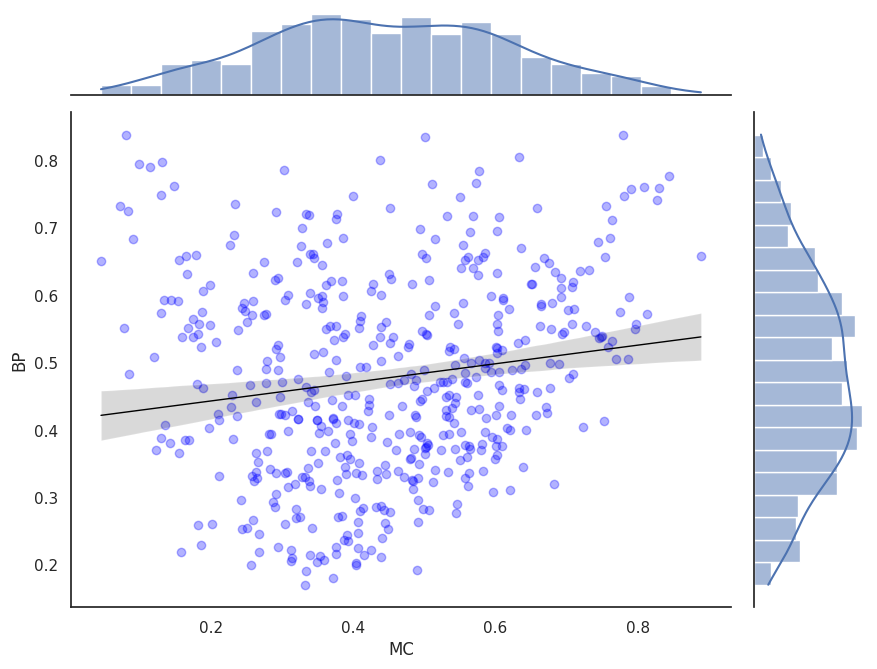

In [89]:
scatter_plot

In [9]:
score_df,hist_plots  = calculate_scores(df, subject_id='eid', time_col='event_dt', hist=True)

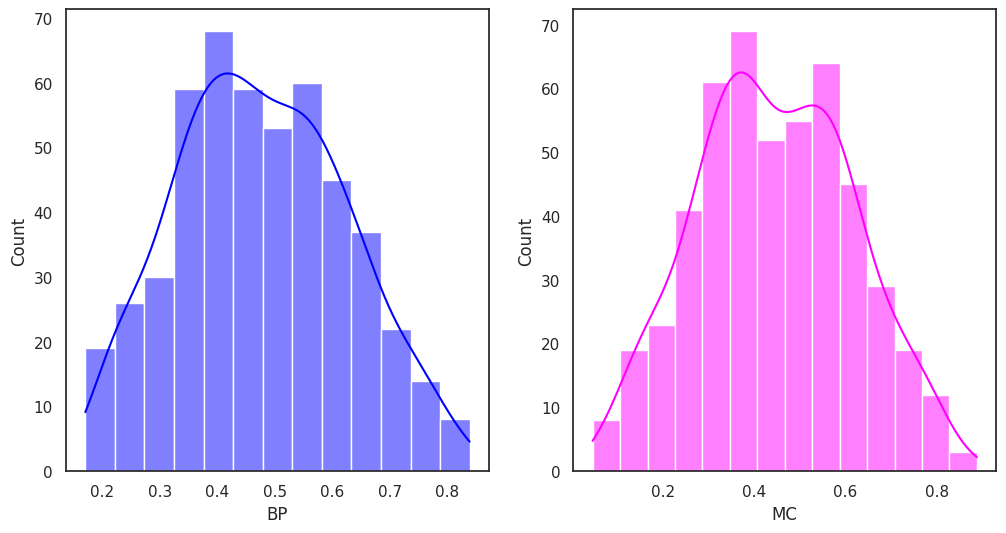

In [10]:
hist_plots

In [11]:
score_df,scatter_plot,hist_plot  = calculate_scores(df, subject_id='eid', time_col='event_dt', scatter=True, hist='Both')

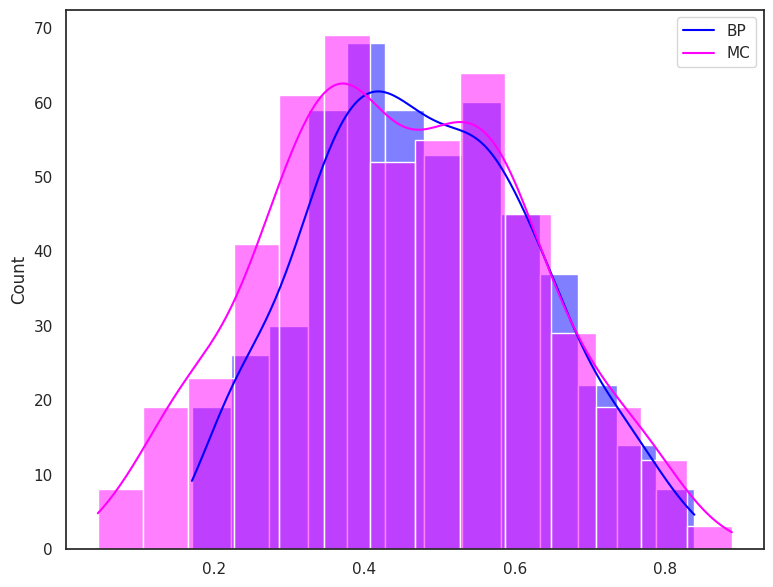

In [12]:
hist_plot

## Detect trains <a id='section_2'></a>

### Parameters

    df : DataFrame
        The DataFrame containing the data.
    subject_id : str
        The column name for subject IDs.
    time_col : str
        The column name for the datetime values.
    max_iet : int
        Maximum distance between consecutive events in a train, in units specified by `time_unit`.
    time_unit : str, optional
        Unit of time for the intervals ('seconds', 'minutes', 'hours', 'days', 'weeks', 'months', and 'years').
        Default is 'days'.
    min_burst : int, optional
        Minimum number of events required to form a train. Default is 3.
    only_trains : bool, optional
        Whether to return only the events that form trains. Default is True.

Note: train_id = 0 is not a train. They represent events that are not in a train. 

In [13]:
train_df = train_detection(df, subject_id = 'eid', time_col = 'event_dt', max_iet=30, time_unit='days', min_burst=3, only_trains= True)

In [14]:
train_df.head()

,eid,data_provider,event_dt,read_2,read_3,value1,value2,value3,train_id
542984,1007157,4,1974-08-15,7H290,NaN,36.947,47.591,NaN,2
543469,1007157,4,1974-08-18,65FV.,NaN,NaN,NaN,NaN,2
543691,1007157,4,1974-08-22,K0A53,NaN,95.000,40.000,NaN,2
544074,1007157,4,1975-05-13,43iG.,NaN,NaN,NaN,NaN,5
544450,1007157,4,1975-05-24,687F2,NaN,83.815,36.296,NaN,5


## Train information <a id='section_3'></a>

We can use the train_info fucntion to find more information about the trains. <br>

### Parameters

    train_df : DataFrame
        DataFrame containing train information.
    subject_id : str
        Name of the column containing subject IDs.
    time_col : str
        Name of the column containing timestamps.
    summary_statistic : bool, optional
        Whether to print summary statistics. Default is False.

In [15]:
train_info_df = train_info(train_df, subject_id = 'eid', time_col = 'event_dt', summary_statistic=True)

Average count of trains per patient: 67.07
Average duration of trains (in days): 99
Median duration of trains (in days): 50
Range of unique events per train: 1 - 3585
Range of all events per train: 3 - 4977


In [16]:
train_info_df.head()

,eid,train_id,unique_event_counts,total_term_counts,train_start,train_end,train_duration_yrs,total_trains
0,1007157,2,3,3,1974-08-15,1974-08-22,0.02,36
1,1007157,5,3,3,1975-05-13,1975-06-15,0.09,36
2,1007157,6,4,4,1975-08-09,1975-09-20,0.11,36
3,1007157,16,3,3,1978-09-24,1978-10-04,0.03,36
4,1007157,18,4,5,1979-08-08,1979-09-26,0.13,36


## Calculate scores of trains <a id='section_4'></a>

We can calculate the scores of the trains detected using the train_scores function. <br>
### Parameters

    train_df : pd.DataFrame
        Input DataFrame.
    subject_id : str
        Name of the column containing subject IDs.
    time_col : str
        Name of the column containing the date.
    min_event_n : int, optional
        Maximum IET for filtering events. Defaults to None.
    scatter : bool, optional
        Whether to plot scatter plot. Defaults to False.
    hist : str or None, optional
        Type of histogram to plot. Options:
        - True: Plot histograms for both BP and MC.
        - "BP": Plot histogram for BP only.
        - "MC": Plot histogram for MC only.
        - "Both": Plot histograms for both BP and MC on the same plot.
        - False: Do not plot any histograms. Defaults to False.

In [17]:
train_score_df = train_scores(train_df, subject_id = 'eid', time_col ='event_dt', min_event_n= 5)
train_score_df.head()

,eid,train_id,BP,MC
0,1007157,19,-0.111111,-0.798446
1,1007157,20,-0.284329,-0.269896
2,1007157,23,-0.333745,-0.500000
3,1007157,24,-0.112983,-0.528501
4,1007157,26,-0.330692,-0.848931


We can display scatter plot and histogram using scatter and hist parameter. <br>

hist (str or None): <br>
- True: Plot histograms for both BP and MC.<br>
- "BP": Plot histogram for BP only.<br>
- "MC": Plot histogram for MC only.<br>
- "Both": Plot histograms for both BP and MC on the same plot.<br>
- None: Do not plot any histograms.<br>

In [18]:
train_score_df, scatter_plot, hist_plot = train_scores(train_df, subject_id='eid', time_col='event_dt', min_event_n=5, scatter=True, hist=True)

In [19]:
train_score_df.head()

,eid,train_id,BP,MC
0,1007157,19,-0.111111,-0.798446
1,1007157,20,-0.284329,-0.269896
2,1007157,23,-0.333745,-0.500000
3,1007157,24,-0.112983,-0.528501
4,1007157,26,-0.330692,-0.848931


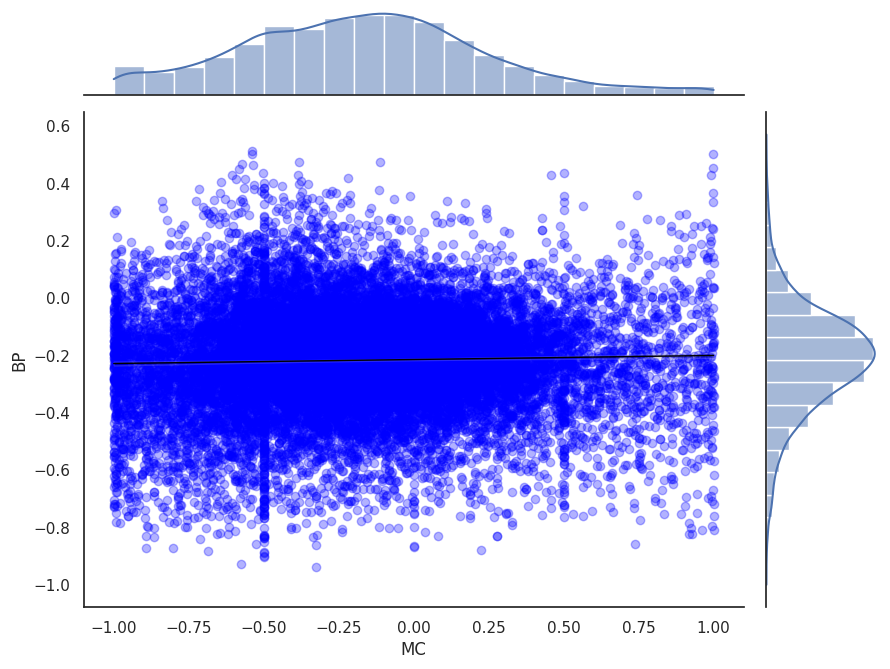

In [20]:
scatter_plot

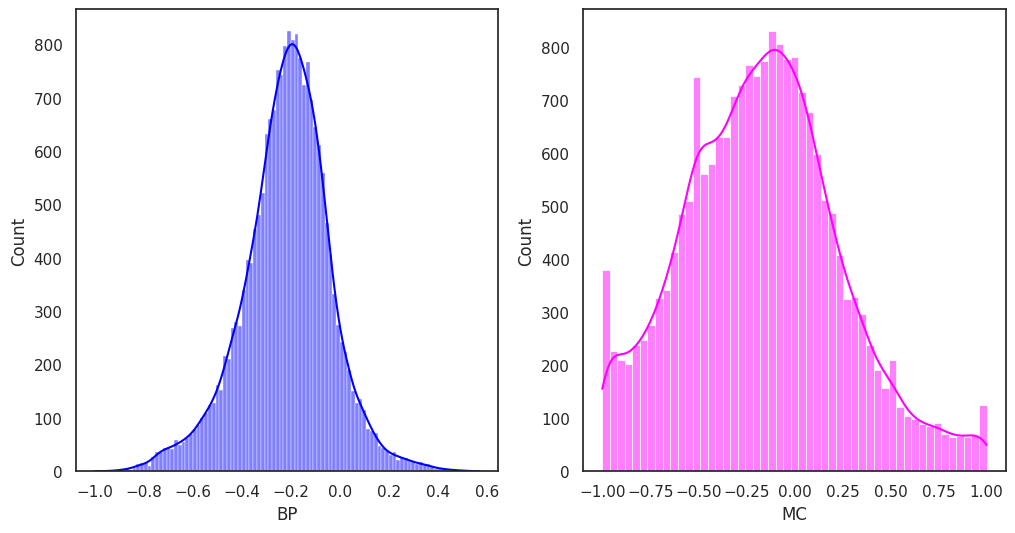

In [ ]:
hist_plot

In [22]:
train_score_df, scatter_plot, hist_plot = train_scores(train_df, subject_id='eid', time_col='event_dt', min_event_n=5, scatter=True, hist="Both")

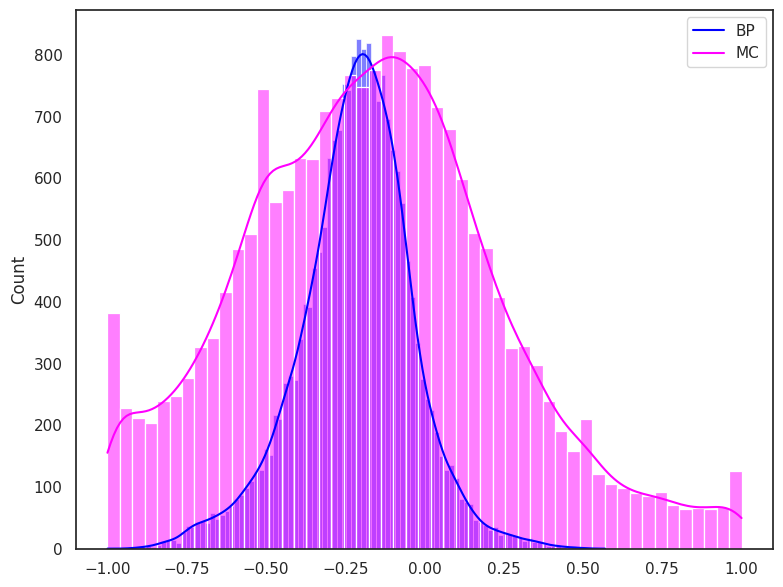

In [23]:
hist_plot

### Plots


In [24]:
gplot = gridplot(train_score_df, bins=25, lower_limit=100)

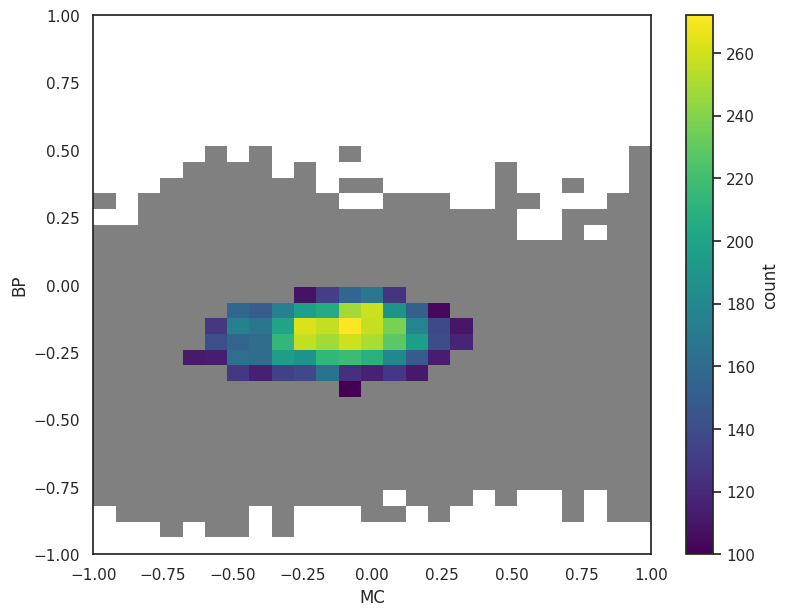

In [25]:
gplot

In [26]:
plot = scatterplot(train_score_df, set_axis=False)

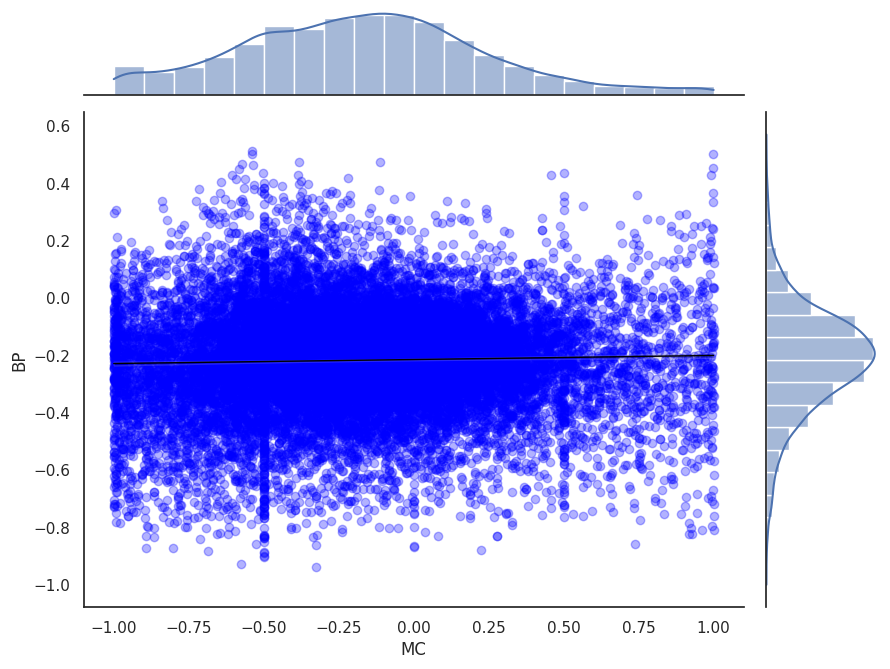

In [27]:
plot

In [28]:
hplot = histogram(train_score_df, hist='Both', set_axis=False)

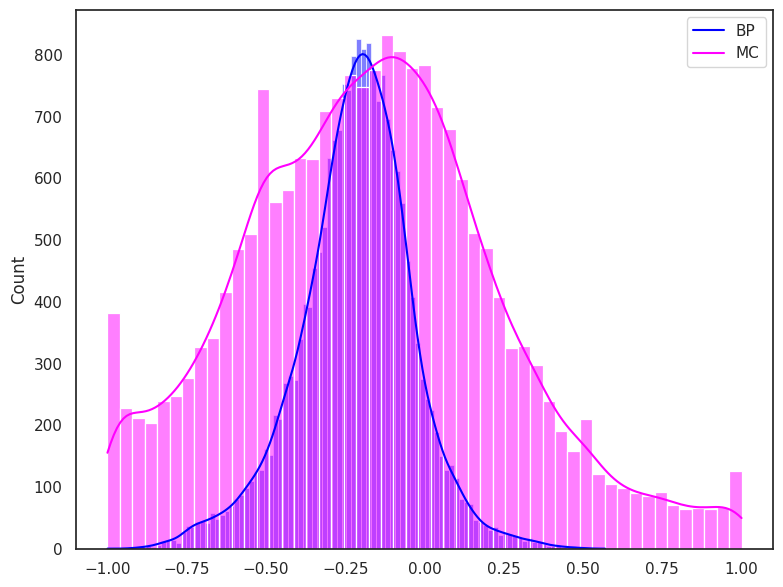

In [29]:
hplot

In [30]:
duration_plot = train_duration(train_info_df, x_limit = 5)

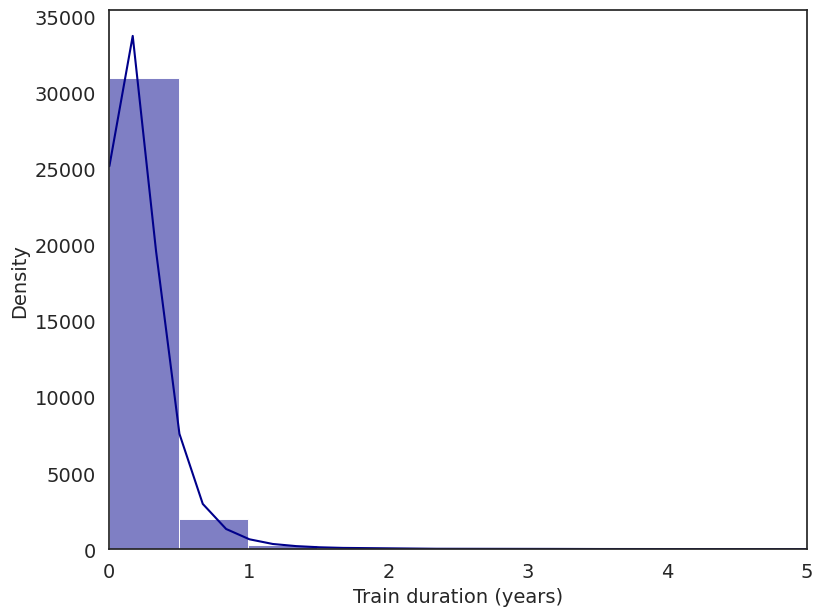

In [31]:
duration_plot

In [32]:
count_plot = event_counts(train_info_df, x_limit=30)

/data/WHRI-Bioinformatics/NIHR_AIM/CPRD/Papers/Burstiness/bursty_dynamics/bursty_dynamics/visual.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


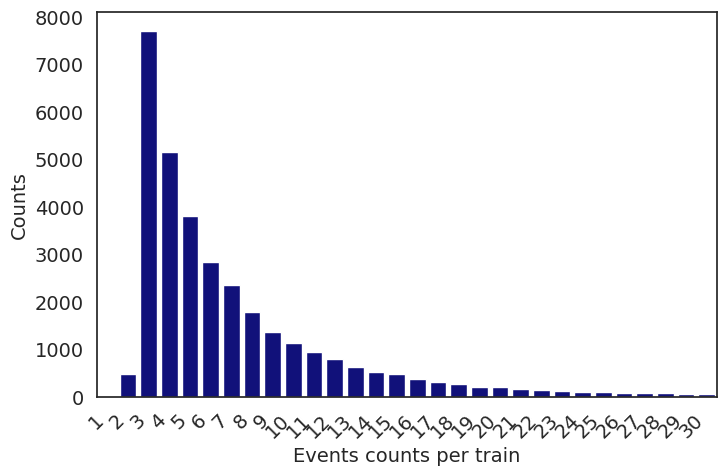

In [33]:
count_plot

# Analysing Data with Gender-based Comparisons <a id='section_5'></a>

## Introduction
In this section, we analyse a dataset of events to understand patterns and differences based on gender. We create synthetic gender data, calculate scores, detect event trains and visualise the data. 

## Data Loading and Preprocessing
We start by loading the data and creating a synthetic gender column.

In [5]:
df = pd.read_csv("example_data.txt", delimiter= '\t')

# create synthetic gender column
np.random.seed(42)
unique_eids = df['eid'].unique()
gender_data = np.random.choice(['M', 'F'], size=len(unique_eids))
eid_to_gender = dict(zip(unique_eids, gender_data))
df['gender'] = df['eid'].map(eid_to_gender)

In [6]:
df.head()

,eid,data_provider,event_dt,read_2,read_3,value1,value2,value3,gender
0,1707540,1,2000-01-01,635..,NaN,NaN,NaN,NaN,M
1,1707540,1,2000-01-01,J11..,NaN,NaN,NaN,NaN,M
2,1707540,1,2000-01-01,12E2.,NaN,NaN,NaN,NaN,M
3,1707540,1,2000-01-01,452..,NaN,33.94,80.319,NaN,M
4,1707540,1,1999-12-31,05K3.,NaN,NaN,NaN,NaN,M


## Scores of entire data

we calculate scores for each subject and merge the gender information.

In [7]:
# calculate scores
score_df = calculate_scores(df, subject_id = 'eid', time_col = 'event_dt')

#add the gender column
score_df = score_df.merge(df[['eid', 'gender']].drop_duplicates(), on='eid', how='left')

We visualize the scores using scatterplots and histograms, differentiating by gender.

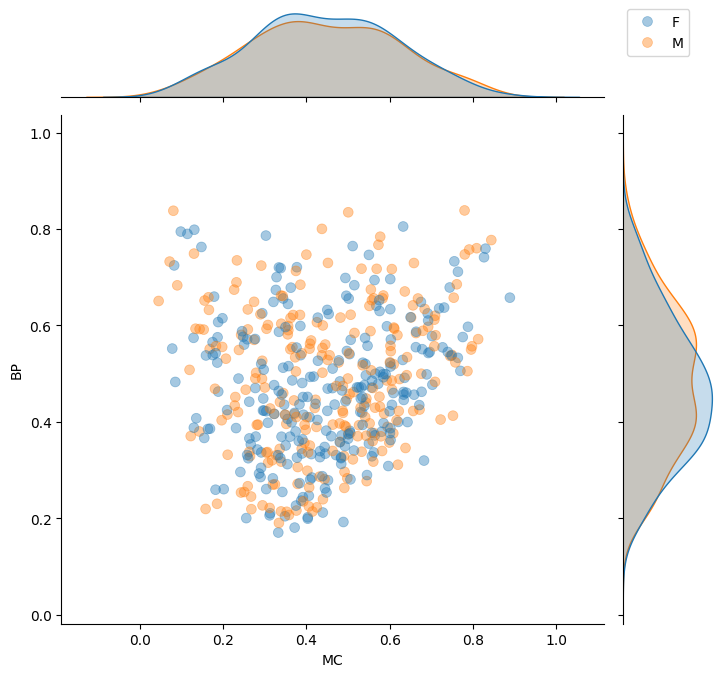

In [8]:
scatterplot(score_df, hue='gender')

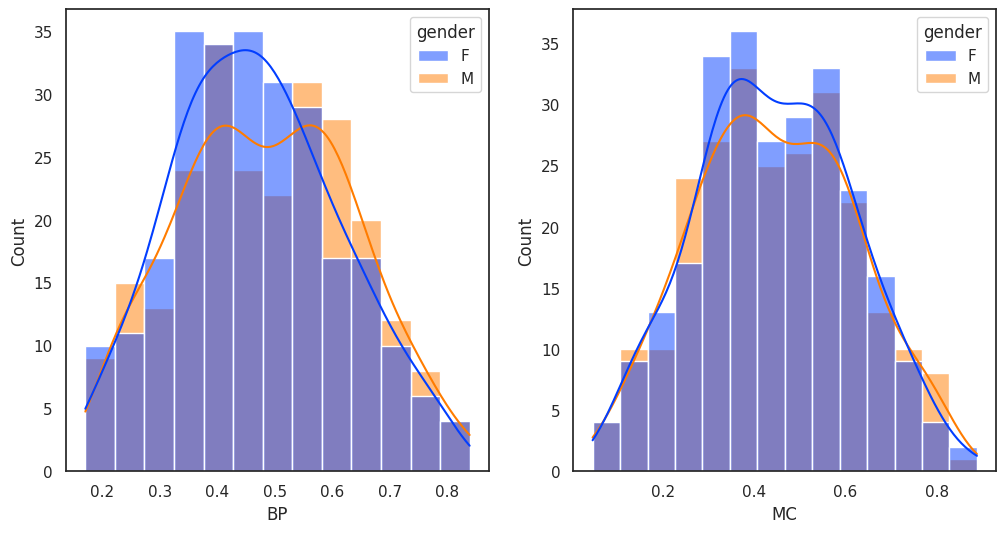

In [9]:
histogram(score_df, hist=True , set_axis=False, hue='gender')

## Train Detection
We detect event trains, analyse train information, and include gender data for further analysis.

In [10]:
# Train detection
train_df = train_detection(df, subject_id = 'eid', time_col = 'event_dt', max_iet=30, time_unit='days', min_burst=3, only_trains= True)

# Train information
train_info_df = train_info(train_df, subject_id = 'eid', time_col = 'event_dt', summary_statistic=True)

# Add the gender column
train_info_df = train_info_df.merge(df[['eid', 'gender']].drop_duplicates(), on='eid', how='left')

Average count of trains per patient: 67.07
Average duration of trains (in days): 99
Median duration of trains (in days): 50
Range of unique events per train: 1 - 3585
Range of all events per train: 3 - 4977


In [45]:
train_df.head()

,eid,data_provider,event_dt,read_2,read_3,value1,value2,value3,gender,train_id
542984,1007157,4,1974-08-15,7H290,NaN,36.947,47.591,NaN,F,2
543469,1007157,4,1974-08-18,65FV.,NaN,NaN,NaN,NaN,F,2
543691,1007157,4,1974-08-22,K0A53,NaN,95.000,40.000,NaN,F,2
544074,1007157,4,1975-05-13,43iG.,NaN,NaN,NaN,NaN,F,5
544450,1007157,4,1975-05-24,687F2,NaN,83.815,36.296,NaN,F,5


We visualise train durations and event counts, differentiating by gender.

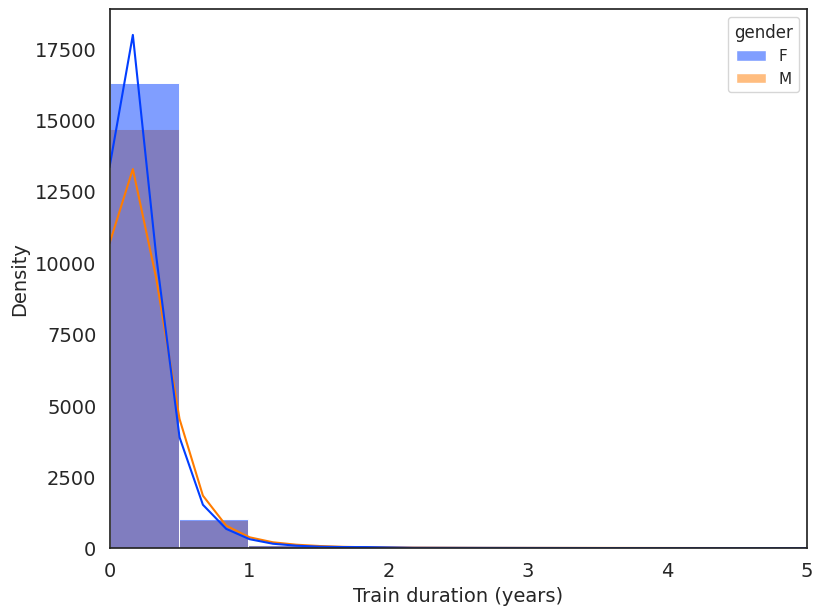

In [11]:
# Train duration
train_duration(train_info_df, hue = 'gender')

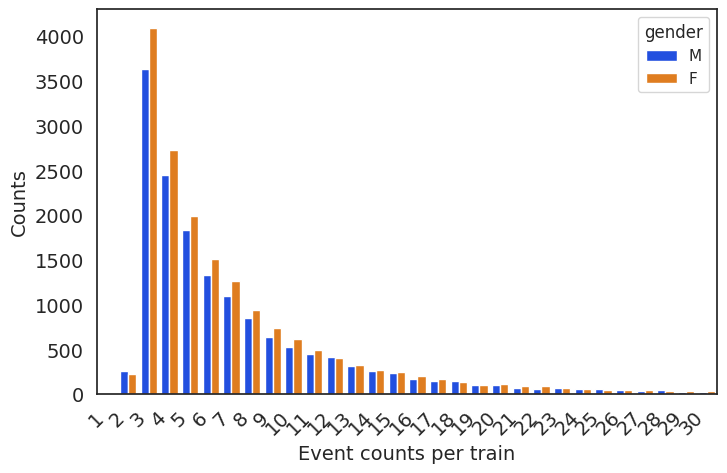

In [12]:
# Event counts
event_counts(train_info_df, hue='gender')